<a href="https://colab.research.google.com/github/olivemideva/python_scripts/blob/main/Metricslab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%ls

drive/  sample_data/


In [ ]:
import pandas as pd

df_main = pd.read_csv('/content/drive/MyDrive/data.csv')

df1 = df_main.copy()
df1.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,42.0,0.0,0.0,Yes,Private,Rural,84.60,27.0,smokes,0
1,Male,77.0,0.0,0.0,Yes,Private,Urban,94.68,33.6,Unknown,0
2,Female,57.0,0.0,0.0,Yes,Govt_job,Urban,110.52,28.5,Unknown,1
3,Male,8.0,0.0,0.0,No,children,Urban,118.66,16.1,Unknown,0
4,Female,66.0,0.0,0.0,Yes,Self-employed,Urban,101.45,29.3,Unknown,1


In [ ]:
# prints the number of unique values
print(df1.nunique())
print('------' * 20)
# prints data types
print(df1.dtypes)
print('------' * 20)
# prints missing/null values
print(df1.isnull().sum())
print('------' * 20)
# prints the number of rows and columns 
print(df1.shape)

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3889
bmi                   342
smoking_status          4
stroke                  2
dtype: int64
------------------------------------------------------------------------------------------------------------------------
gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
------------------------------------------------------------------------------------------------------------------------
gender                3
age                   1
hypertension          9
heart_disease        13
ever_married          4
work_t

In [ ]:
# Get rid of rows that are blank

print(df1.shape)
# drops/delete rows with null/missing values
df1.dropna(inplace = True)
# prints rows and columns again to check if rows were dropped
print(df1.shape)

(4981, 11)
(4906, 11)


In [ ]:
# check for missing/null values
print(df1.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# displays data types to help in encoding
print(df1.dtypes)

gender                object
age                  float64
hypertension         float64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [ ]:
# import encoder
from sklearn.preprocessing import LabelEncoder

# create encoding object
le = LabelEncoder()

# encode string data types to int data types
df1['gender'] = le.fit_transform(df1['gender'])
df1['ever_married'] = le.fit_transform(df1['ever_married'])
df1['work_type'] = le.fit_transform(df1['work_type'])
df1['Residence_type'] = le.fit_transform(df1['Residence_type'])
df1['smoking_status'] = le.fit_transform(df1['smoking_status'])

print(df1.dtypes)

gender                 int64
age                  float64
hypertension         float64
heart_disease        float64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


In [ ]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df1.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,42.0,0.0,0.0,1,1,0,84.60,27.0,3,0
1,1,77.0,0.0,0.0,1,1,1,94.68,33.6,0,0
2,0,57.0,0.0,0.0,1,0,1,110.52,28.5,0,1
3,1,8.0,0.0,0.0,0,3,1,118.66,16.1,0,0


In [ ]:
# scalling
# import scaller
from sklearn.preprocessing import StandardScaler

# create scaling object
scaler = StandardScaler()

df1[['age', 'avg_glucose_level', 'bmi' ]] = scaler.fit_transform(df1[['age', 'avg_glucose_level', 'bmi' ]])
df1.head(4)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,-0.062545,0.0,0.0,1,1,0,-0.474482,-0.218898,3,0
1,1,1.482195,0.0,0.0,1,1,1,-0.251349,0.752515,0,0
2,0,0.599487,0.0,0.0,1,0,1,0.099288,0.001878,0,1
3,1,-1.563148,0.0,0.0,0,3,1,0.279476,-1.823200,0,0


In [ ]:
x = df1.drop('stroke', axis = 1)
y = df1['stroke']

print(x.shape)
print(y.shape)

(4906, 10)
(4906,)


In [ ]:
# test_size = 0.2
# random_state = 42

import random

test_size = (random.randint(1, 50)) / 100
random_state = (random.randint(1, 50))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = random_state)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4660, 10)
(4660,)
(246, 10)
(246,)


In [ ]:
# model building knn

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

In [ ]:
# generate confusion matrix method 1

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, knn_pred)

print(cm_knn)

[[232   2]
 [ 12   0]]


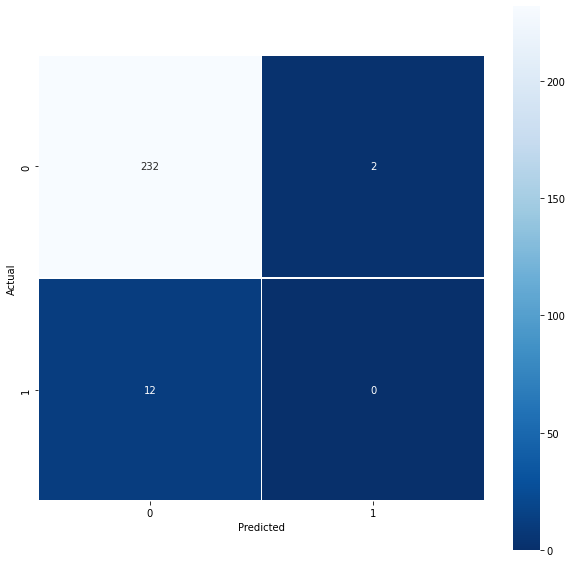

In [ ]:
# generate confusion matrix method 2

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 10))
sns.heatmap(cm_knn, annot = True, fmt = "d", linewidths=0.5, square = True, cmap = 'Blues_r')
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
# get metrics method 1
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       234
           1       0.00      0.00      0.00        12

    accuracy                           0.94       246
   macro avg       0.48      0.50      0.49       246
weighted avg       0.90      0.94      0.92       246



In [ ]:
# get metrics method 2
# Accuracy = (TP + TN)/(TP + TN + FP + FN)
print((932 + 1)/(932 + 1 + 43 + 6))

0.9501018329938901


ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

"""
2 hidden layers - 10 neurons
1 output - 1 neurons
1 input - 10 neurons
"""

model = Sequential()
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# train model
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
146/146 [==============================] - 1s 4ms/step - loss: 0.3286 - accuracy: 0.9479 - val_loss: 0.2244 - val_accuracy: 0.9512
Epoch 2/10
146/146 [==============================] - 0s 3ms/step - loss: 0.1953 - accuracy: 0.9494 - val_loss: 0.1858 - val_accuracy: 0.9512
Epoch 3/10
146/146 [==============================] - 0s 2ms/step - loss: 0.1757 - accuracy: 0.9494 - val_loss: 0.1658 - val_accuracy: 0.9512
Epoch 4/10
146/146 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9494 - val_loss: 0.1598 - val_accuracy: 0.9512
Epoch 5/10
146/146 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9494 - val_loss: 0.1560 - val_accuracy: 0.9512
Epoch 6/10
146/146 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9494 - val_loss: 0.1545 - val_accuracy: 0.9512
Epoch 7/10
146/146 [==============================] - 0s 2ms/step - loss: 0.1620 - accuracy: 0.9494 - val_loss: 0.1535 - val_accuracy: 0.9512
Epoch 

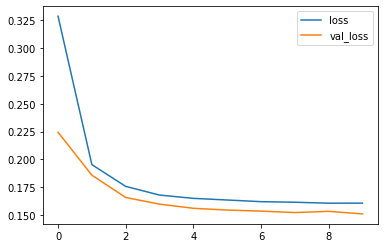

In [ ]:
# information lost
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()